In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# POIC values from PIC paper https://arxiv.org/pdf/2103.12726 (Figure 3, Table 11)
poic_values = [0.153418, 0.005060, 0.000357, 0.030092, 0.106989, 0.000751, 0.000165, 0.000107, 0.000102, 5e-05, 0.000308, 0.007751, 0.019111]

norm_algo_complexity_scores = [0.970, 0.710, 0.491, 0.566, 0.759, 0.575, 0.523, 0.619, 0.583, 0.466, 0.597, 0.691, 0.752] 

poic_envs = ["CartPole", "Pendulum", "MountainCar", "MountainCarContinuous", "Acrobat", "Ant", "HalfCHeetah", "Hopper", "Walker2d", "Humanoid", "cheetah_run", "reacher easy", "ball_in_cup catch"]

# Sort the values and their corresponding envs by ascending POIC values
sorted_poic_value_pairs = sorted(zip(poic_envs, poic_values), key=lambda x: x[1])
sorted_poic_envs, sorted_poic_values = zip(*sorted_poic_value_pairs)

# Sort the normalized algorithm complexity scores in the same order as the POIC values
sorted_algo_complexity_pairs = sorted(zip(norm_algo_complexity_scores, poic_values), key=lambda x: x[1])
sorted_algo_complexity_scores, _ = zip(*sorted_algo_complexity_pairs)


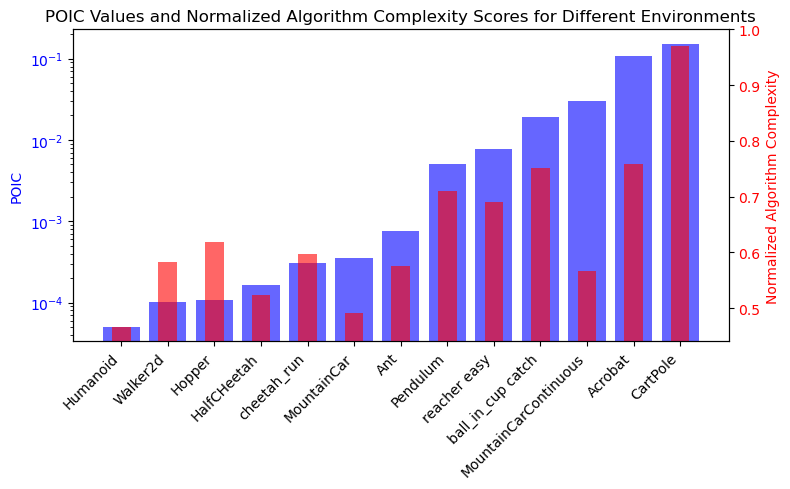

In [52]:
# Plot the POIC values on a log scale on the left y-axis
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(sorted_poic_envs, sorted_poic_values, color='b', alpha=0.6, label='POIC')
ax1.set_yscale('log')
ax1.set_ylabel("POIC", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(range(len(sorted_poic_envs)))
ax1.set_xticklabels(sorted_poic_envs, rotation=45, ha="right")

# Create a twin axis for the normalized algorithm complexity scores
bar_width = 0.4
ax2 = ax1.twinx()
ax2.bar(sorted_poic_envs, sorted_algo_complexity_scores, width=bar_width, color='r', alpha=0.6, label='Normalized Algo Complexity')
ax2.set_ylabel("Normalized Algorithm Complexity", color='r')
ax2.tick_params(axis='y', labelcolor='r')
# Set y-axis limits
ax2.set_ylim(sorted_algo_complexity_scores[0] - 0.025, 1)

# Add a title and show the plot
plt.title("POIC Values and Normalized Algorithm Complexity Scores for Different Environments")
fig.tight_layout()
plt.show()

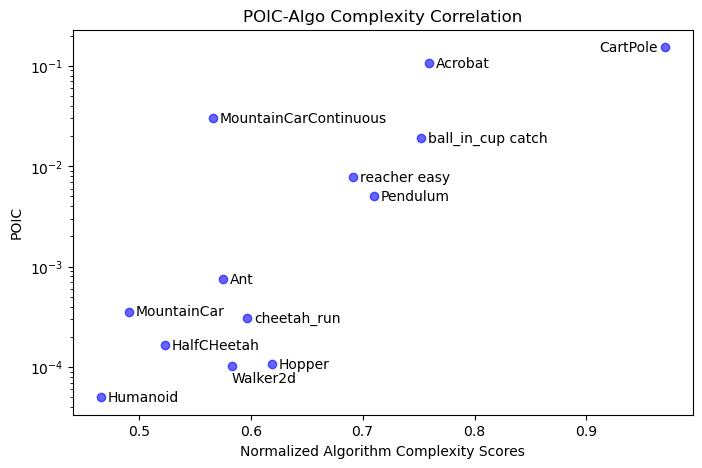

The correlation coefficient between the POIC values and the normalized algorithm complexity scores is 0.81


In [51]:
# Plot the POIC values on a log scale on the y axis and the normalized algorithm complexity scores on the x axis
plt.figure(figsize=(8, 5))
plt.scatter(sorted_algo_complexity_scores, sorted_poic_values, color='b', alpha=0.6, label='POIC')
plt.yscale("log")
plt.xlabel("Normalized Algorithm Complexity Scores")
plt.ylabel("POIC")
plt.title("POIC-Algo Complexity Correlation")
# Show the environment names at the points
for i in range(len(sorted_poic_envs)):
    if sorted_poic_envs[i] == "Walker2d":
        plt.annotate(sorted_poic_envs[i], (sorted_algo_complexity_scores[i], sorted_poic_values[i]), textcoords="offset points", xytext=(0, -4), ha='left',va='top')
    elif sorted_poic_envs[i] == "CartPole":
        plt.annotate(sorted_poic_envs[i], (sorted_algo_complexity_scores[i], sorted_poic_values[i]), textcoords="offset points", xytext=(-5, 5), ha='right',va='top')
    else:
        plt.annotate(sorted_poic_envs[i], (sorted_algo_complexity_scores[i], sorted_poic_values[i]), textcoords="offset points", xytext=(5, 5), ha='left',va='top')
plt.show()

# Calculate the correlation coefficient between the POIC values and the normalized algorithm complexity scores
corr_coef = np.corrcoef(sorted_algo_complexity_scores, sorted_poic_values)[0, 1]
print(f"The correlation coefficient between the POIC values and the normalized algorithm complexity scores is {corr_coef:.2f}")

